In [689]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import calendar
import seaborn as sns

# 1. Data Acquisition

In [690]:
# Loading Crime Dataset
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present 2.csv')

In [691]:
# Checking the shape of the dataframe
crime_data.shape

(807377, 28)

# 2. Data Inspection:

In [692]:
# Displaying first 5 rows of the dataframe
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/20 0:00,1/8/20 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/20 0:00,1/1/20 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,4/14/20 0:00,2/13/20 0:00,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/20 0:00,1/1/20 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/20 0:00,1/1/20 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [693]:
# Creating Copy of the Dataframe
data_crime = crime_data.copy()

In [694]:
# Checking datatypes of the Dataframe
crime_data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2           object
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [695]:
# Printing Columns of the Dataframe
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [696]:
# Information about the Dataframe including the index dtype and columns, non-null values and memory usage
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807377 entries, 0 to 807376
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           807377 non-null  int64  
 1   Date Rptd       807377 non-null  object 
 2   DATE OCC        807377 non-null  object 
 3   TIME OCC        807377 non-null  int64  
 4   AREA            807377 non-null  int64  
 5   AREA NAME       807377 non-null  object 
 6   Rpt Dist No     807377 non-null  int64  
 7   Part 1-2        807377 non-null  object 
 8   Crm Cd          807377 non-null  int64  
 9   Crm Cd Desc     807377 non-null  object 
 10  Mocodes         696010 non-null  object 
 11  Vict Age        807377 non-null  int64  
 12  Vict Sex        701468 non-null  object 
 13  Vict Descent    701460 non-null  object 
 14  Premis Cd       807368 non-null  float64
 15  Premis Desc     806901 non-null  object 
 16  Weapon Used Cd  281174 non-null  float64
 17  Weapon Des

# 3. Data Cleaning:

In [697]:
# checking the missing values in crime dataframe
crime_data.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           111367
Vict Age               0
Vict Sex          105909
Vict Descent      105917
Premis Cd              9
Premis Desc          476
Weapon Used Cd    526203
Weapon Desc       526203
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          747894
Crm Cd 3          805390
Crm Cd 4          807319
LOCATION               0
Cross Street      678145
LAT                    0
LON                    0
dtype: int64

In [698]:
# functions to drop/dropna columns
def drop_columns(df,columns_to_drop):
    return df.drop(columns=columns_to_drop,inplace=True)

def dropna_columns(df,columns_to_drop):
    return df.dropna(subset=columns_to_drop,inplace=True)

In [699]:
# Droping Column
column_to_dropna = ['Crm Cd 1']
dropna_columns(crime_data,column_to_dropna)

In [700]:
# handling the H and - values by adding them to X
crime_data['Vict Sex'].replace(to_replace=['H','-'],value='X',inplace=True)
crime_data['Vict Sex'].fillna('X',inplace=True)
print(crime_data['Vict Sex'].unique())

['F' 'M' 'X']


In [701]:
# Gender count of victims
crime_data['Vict Sex'].value_counts()

M    333678
F    297639
X    176050
Name: Vict Sex, dtype: int64

In [702]:
# adding column for - weapon used or not 
crime_data['Weapon Used'] = crime_data['Weapon Used Cd'].apply(lambda x: 1 if pd.notna(x) else 0)

In [703]:
# filling missing values with 'unknown' and '0'
crime_data['Premis Desc'] = crime_data['Premis Desc'].fillna('Unknown')
crime_data['Premis Cd'] = crime_data['Premis Cd'].fillna(0)

In [704]:
# replaced nan values of 'cross street' with '' and added them to Location column 
crime_data['Cross Street'].fillna('',inplace=True)
crime_data['LOCATION'] = crime_data['LOCATION'] + ' ' + crime_data['Cross Street']

In [705]:
# Checking any Null values in the Dataframe
crime_data.isna().sum().sort_values(ascending=False)

Crm Cd 4          807309
Crm Cd 3          805380
Crm Cd 2          747894
Weapon Used Cd    526196
Weapon Desc       526196
Mocodes           111367
Vict Descent      105916
DR_NO                  0
LON                    0
LAT                    0
Cross Street           0
LOCATION               0
Crm Cd 1               0
Status Desc            0
Status                 0
Premis Cd              0
Premis Desc            0
Date Rptd              0
Vict Sex               0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
DATE OCC               0
Weapon Used            0
dtype: int64

In [706]:
# converting datetime column to correct datatype
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])

In [707]:
# Creating copy of the Dataframe
crime_data1 = crime_data.copy()

In [708]:
# Checking shape of the Dataframe 
crime_data.shape

(807367, 29)

In [709]:
# converting time to hour minute format
crime_data['TIME OCC'] = crime_data['TIME OCC'].apply(lambda x: f'{x//100:02}:{x%100:02}')

In [710]:
# Combining date and time (hour, minute) of crime occured
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['DATE OCC'].str.split().str[0]+' '+crime_data['TIME OCC'].astype(str))

In [711]:
# Converting the Datatype of the Columns
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['Date Time OCC'])

In [712]:
# rearranging columns
temp = crime_data.pop('Date Time OCC')
crime_data.insert(2,'Date Time OCC',temp)

In [713]:
# count of victim descents and missing values
print(crime_data['Vict Descent'].value_counts())
print('The missing values in Vict Descent column:',crime_data['Vict Descent'].isna().sum())

H    247787
W    164842
B    115215
X     77446
O     64019
A     17678
K      4297
F      3360
C      3089
J      1123
V       830
I       765
Z       408
P       216
U       166
D        59
G        55
L        49
S        45
-         2
Name: Vict Descent, dtype: int64
The missing values in Vict Descent column: 105916


In [714]:
# filling and replacing missing/unknown values
crime_data['Vict Descent'].fillna('X',inplace=True)
crime_data['Vict Descent'].replace(to_replace='-',value='X',inplace=True)

In [715]:
# handling semantic errors in data
crime_data = crime_data[crime_data['Vict Age'].between(0, 100)]

In [716]:
# dropping irrelevant columns (relevant information already extracted from the columns or are irrelevant)
column_to_drop=['Crm Cd 2','Crm Cd 3','Crm Cd 4','AREA','Part 1-2','Cross Street','DATE OCC','TIME OCC',
                'Weapon Used Cd','Weapon Desc','Mocodes']
drop_columns(crime_data,column_to_drop)

In [717]:
# the cleaned dataset
print('The nan values in dataset:\n',crime_data.isna().sum())
print('\nThe shape of cleaned dataset:\n',crime_data.shape)

The nan values in dataset:
 DR_NO            0
Date Rptd        0
Date Time OCC    0
AREA NAME        0
Rpt Dist No      0
Crm Cd           0
Crm Cd Desc      0
Vict Age         0
Vict Sex         0
Vict Descent     0
Premis Cd        0
Premis Desc      0
Status           0
Status Desc      0
Crm Cd 1         0
LOCATION         0
LAT              0
LON              0
Weapon Used      0
dtype: int64

The shape of cleaned dataset:
 (807298, 19)


In [718]:
# Displaying first 5 rows of the Dataframe
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0


In [719]:
# Creating columns for year, month and year_month
crime_data['Year'] = crime_data['Date Time OCC'].dt.year
crime_data['Month'] = crime_data['Date Time OCC'].dt.month
crime_data['Year_Month'] = crime_data['Date Time OCC'].dt.strftime('%Y-%m')

In [720]:
# Displaying first 5 rows of the Dataframe
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01


In [721]:
# Converting Time OCC column into hours and minutes
crime_data1['TIME OCC'] = crime_data1['TIME OCC'].apply(lambda x: f'{x//100:02}:{x%100:02}')

In [722]:
# Converting into Date time format
crime_data1['DATE OCC'] = pd.to_datetime(crime_data1['DATE OCC'])
crime_data1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,,34.0141,-118.2978,1
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,,34.0459,-118.2545,1
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,,34.0448,-118.2474,0
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,,34.1685,-118.4019,0
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,,34.2198,-118.4468,0


## Visualize overall crime trends from 2020 to the present year.

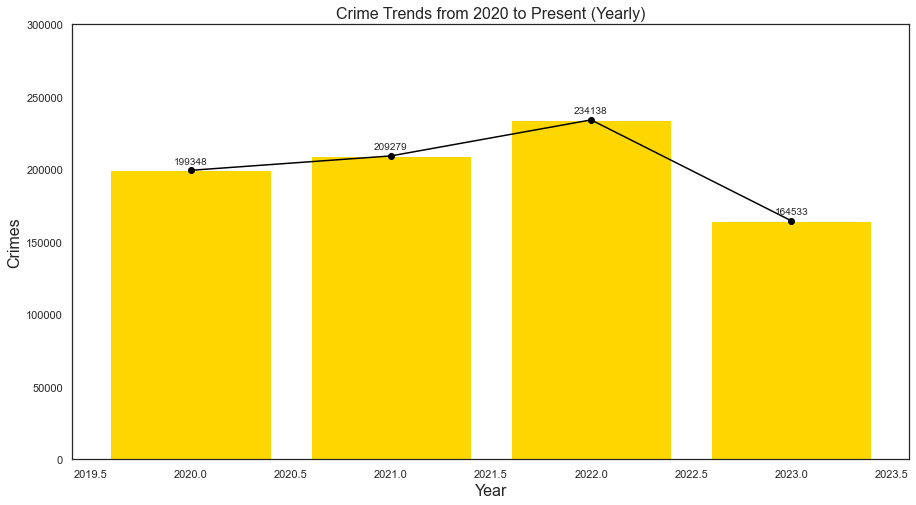

In [723]:
# Displaying yearly crime count over the years
yearly_crime_counts = crime_data.groupby('Year').size().reset_index(name='Crime Counts')

plt.figure(figsize=(15, 8))
bars = plt.bar(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color = 'Gold')
plt.ylim(0, 300000)

plt.plot(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color='black', marker='o')

for x, y in zip(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts']):
    plt.text(x, y + 0.01 * 300000, f'{y}', ha='center', va='bottom')

plt.title('Crime Trends from 2020 to Present (Yearly)', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Crimes', fontsize = 16)
# plt.grid(axis='y')
plt.show()


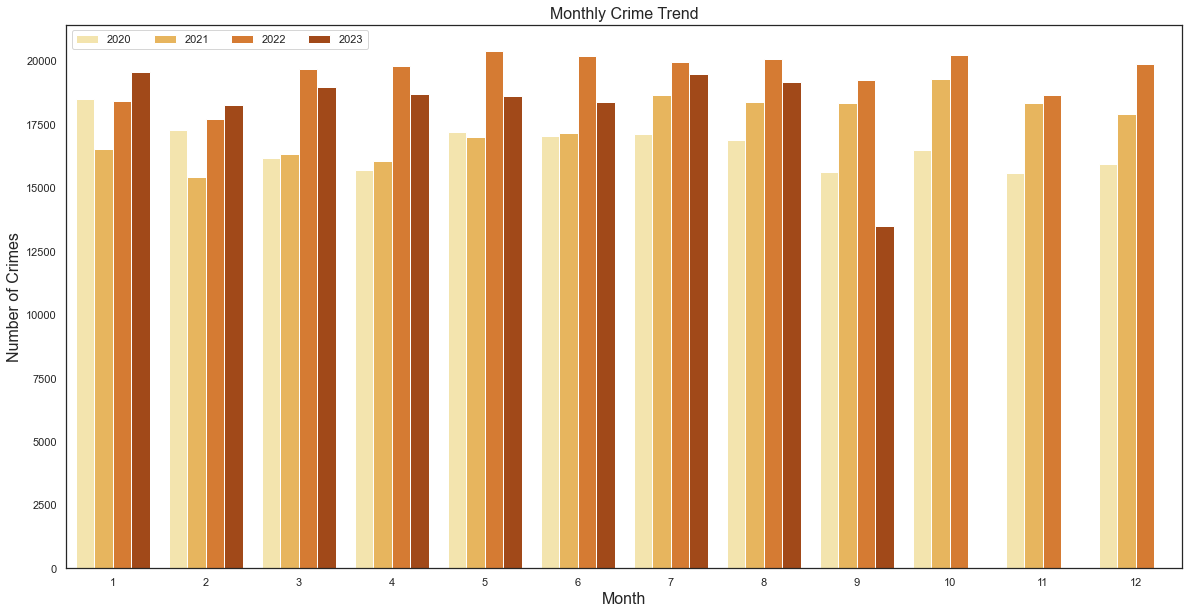

In [724]:
# Displaying monthly crime trends
plt.figure(figsize=(20,10))
sns.countplot(data=crime_data, x='Month', hue='Year', palette='YlOrBr')
plt.title('Monthly Crime Trend',fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

## Analyze and visualize seasonal patterns in crime data.

In [725]:
# Displaying first 5 rows of the dataframe
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01


In [726]:
# Grouping the monthly average crime
monthly_avg = crime_data.groupby(crime_data['Month']).size()

In [727]:
# Displaying Descriptive Statistics for Monthly crime
print("Descriptive Statistics for Monthly Crimes:")
print(monthly_avg.describe())

Descriptive Statistics for Monthly Crimes:
count       12.000000
mean     67274.833333
std       8338.348756
min      52530.000000
25%      64021.250000
50%      70639.000000
75%      73027.750000
max      75168.000000
dtype: float64


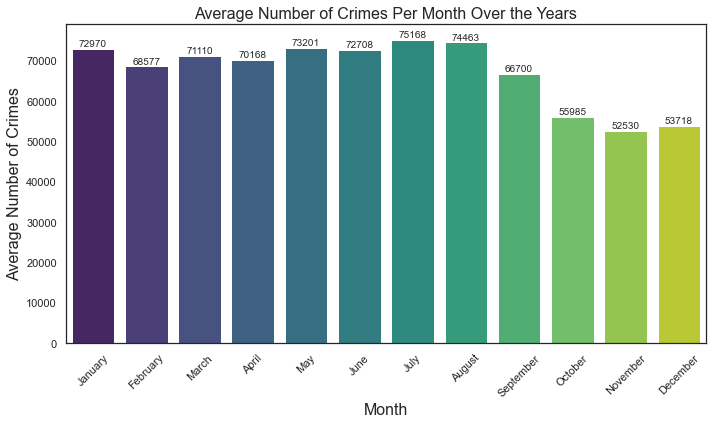

In [728]:
# Displaying Average number of crimes per month over the years
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=monthly_avg.reset_index(), x='Month', y=0, palette='viridis')
plt.title('Average Number of Crimes Per Month Over the Years', fontsize = 16)
plt.ylabel('Average Number of Crimes', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


## Identify the most common type of crime and its trends over time.

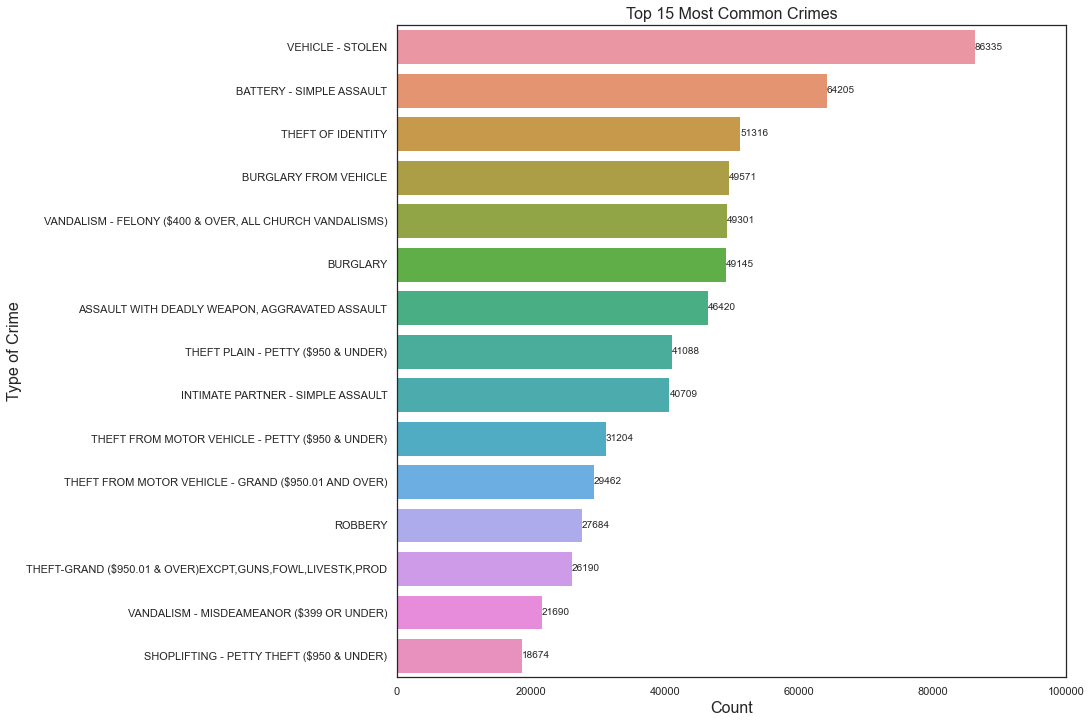

In [729]:
# Displaying most common type of crimes
plt.figure(figsize=(12, 12))

top_crimes = crime_data['Crm Cd Desc'].value_counts().nlargest(15)

crime_plot = sns.countplot(data=crime_data, y='Crm Cd Desc',order=top_crimes.index)

plt.title('Top 15 Most Common Crimes', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.ylabel('Type of Crime', fontsize = 16)
plt.xlim(0, 100000)

for bar in crime_plot.patches:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}', 
        va='center'
    )
plt.show()


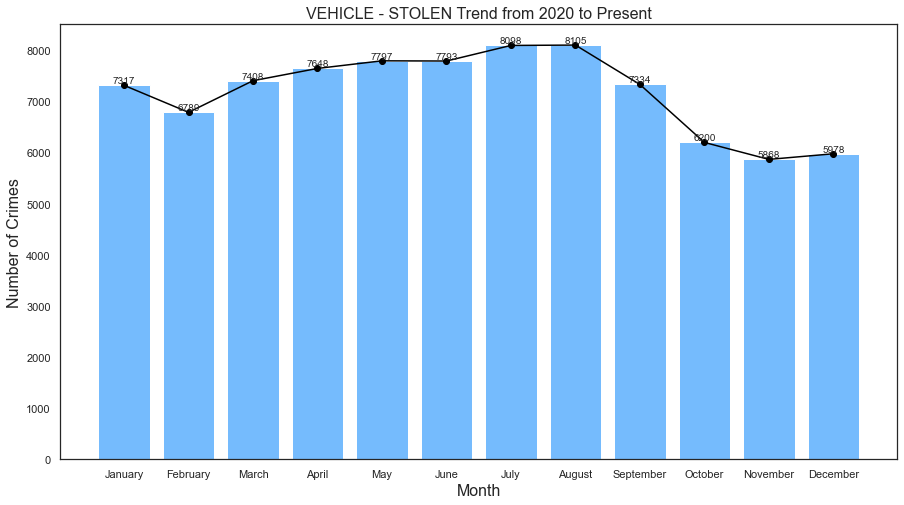

In [730]:
# Displaying Top crime trend over the years
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]

filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]

monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

monthly_trend.sort_values('Month', inplace=True)

monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(15, 8))
bars = plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.title(f'{top_crime} Trend from 2020 to Present', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()


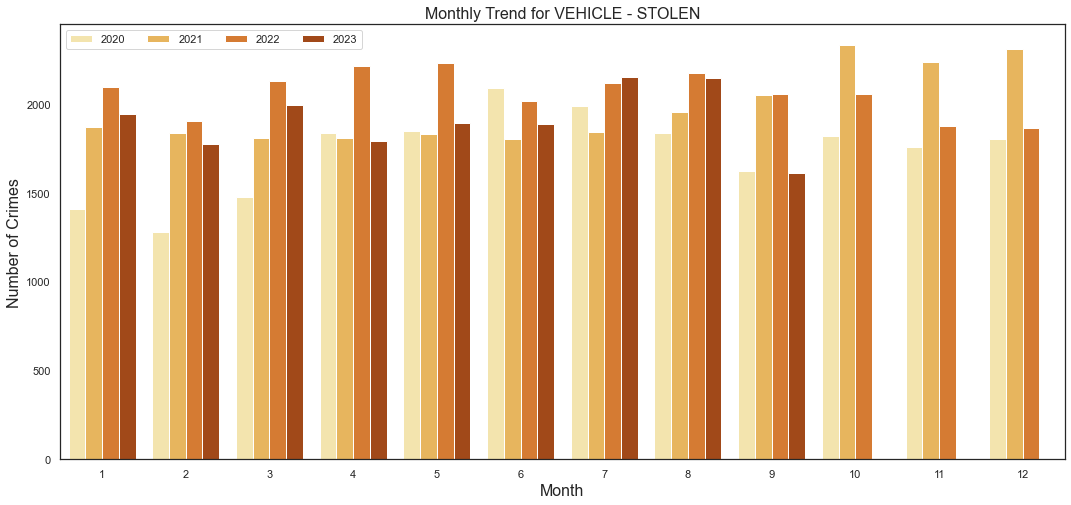

In [731]:
#Monthly Trend for Vehicle - Stolen
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]
filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]
plt.figure(figsize=(18, 8))
sns.countplot(data=filtered_data, x='Month', hue='Year', palette='YlOrBr')
plt.title(f'Monthly Trend for {top_crime}', fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

## Investigate if there are any notable differences in crime rates between regions or cities

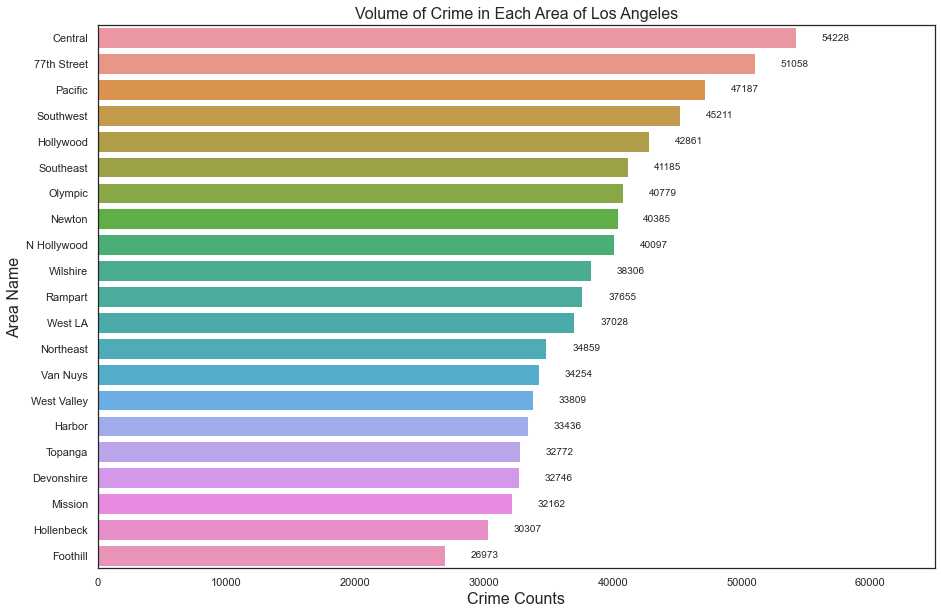

In [732]:
# Displaying any notable differences in crime rates between regions or cities
plt.figure(figsize=(15, 10))

order = crime_data['AREA NAME'].value_counts().index
sns.countplot(y='AREA NAME', data=crime_data, order=order)

plt.xlabel('Crime Counts', fontsize = 16)
plt.ylabel('Area Name', fontsize = 16)
plt.title('Volume of Crime in Each Area of Los Angeles', fontsize = 16)
plt.xlim(0,65000)

# Adding the count at the end of each bar
for bar in plt.gca().patches:
    plt.text(bar.get_width() + 2000,  # Adding 2000 to move the text slightly right
             bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())),
             va="center")

plt.show()


In [733]:
# Calculating Crime statistics based on area name
statistics = crime_data['AREA NAME'].value_counts().describe()
print(statistics)

count       21.000000
mean     38442.761905
std       6895.542763
min      26973.000000
25%      33436.000000
50%      37655.000000
75%      41185.000000
max      54228.000000
Name: AREA NAME, dtype: float64


## Explore correlations between economic factors (if available) and crime rates

In [734]:
# Loading Monthly Inflation Data
infla = pd.read_csv("Inflation_rate.csv")

**Reference:**

https://data.bls.gov/pdq/SurveyOutputServlet - for Unemployment Data

https://www.bls.gov/regions/mid-atlantic/data/consumerpriceindexhistorical_us_table.htm - for Inflation Rate

In [735]:
# Displaying first 5 rows of the dataframe
infla.head()

,Date,Inflation Rate,Unemployment rate
0,2020-01,0.2,4.9
1,2020-02,0.1,4.9
2,2020-03,-0.4,6.7
3,2020-04,-0.8,17.0
4,2020-05,-0.1,19.0


In [736]:
# Creating a new dataframe with monthly crime counts
df = crime_data.copy()
df['month-year'] = df['Date Time OCC'].dt.strftime('%m-%Y')
df = df.groupby('month-year')['Crm Cd'].mean()
df_1 = df.to_frame().reset_index()
df_1 = df_1.rename(columns={'month-year':'Date','Crm Cd':'Crime'})
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1['days_in_month'] = df_1['Date'].dt.days_in_month
df_1.head()

,Date,Crime,days_in_month
0,2020-01-01,510.458290,31
1,2021-01-01,504.323570,31
2,2022-01-01,493.799446,31
3,2023-01-01,488.039237,31
4,2020-02-01,513.959019,29


In [737]:
 # Creating a Dataset with Montly crimes from Jan 2020 and adding each month inflation to it.
df_1['Unemployment'] = infla['Unemployment rate']
df_1['Inflation'] = infla['Inflation Rate']

df_1.head()

,Date,Crime,days_in_month,Unemployment,Inflation
0,2020-01-01,510.458290,31,4.9,0.2
1,2021-01-01,504.323570,31,4.9,0.1
2,2022-01-01,493.799446,31,6.7,-0.4
3,2023-01-01,488.039237,31,17.0,-0.8
4,2020-02-01,513.959019,29,19.0,-0.1


              Crime  Inflation
Crime      1.000000   0.230833
Inflation  0.230833   1.000000


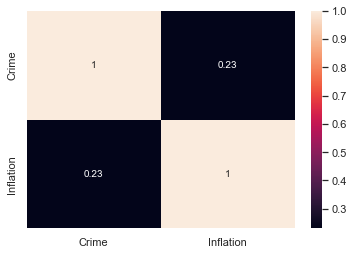

In [738]:
# Calculating the Correlation between Crime and Inflation
corr_matrix = df_1[['Crime', 'Inflation']].astype(float).corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

As we can observe from the above heatmap there is weak Positive Correlation (0.23) between Inflation rate and Crime rate.

                 Crime  Unemployment
Crime         1.000000     -0.057009
Unemployment -0.057009      1.000000


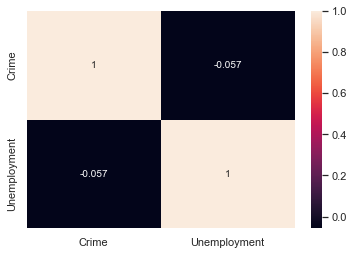

In [739]:
# Calculating the Correlation between Crime and Unemployment
corr_matrix = df_1[['Crime', 'Unemployment']].astype(float).corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

As we can observe from the above heatmap there is no Correlation (-0.057) between Unemployment rate and Crime rate.

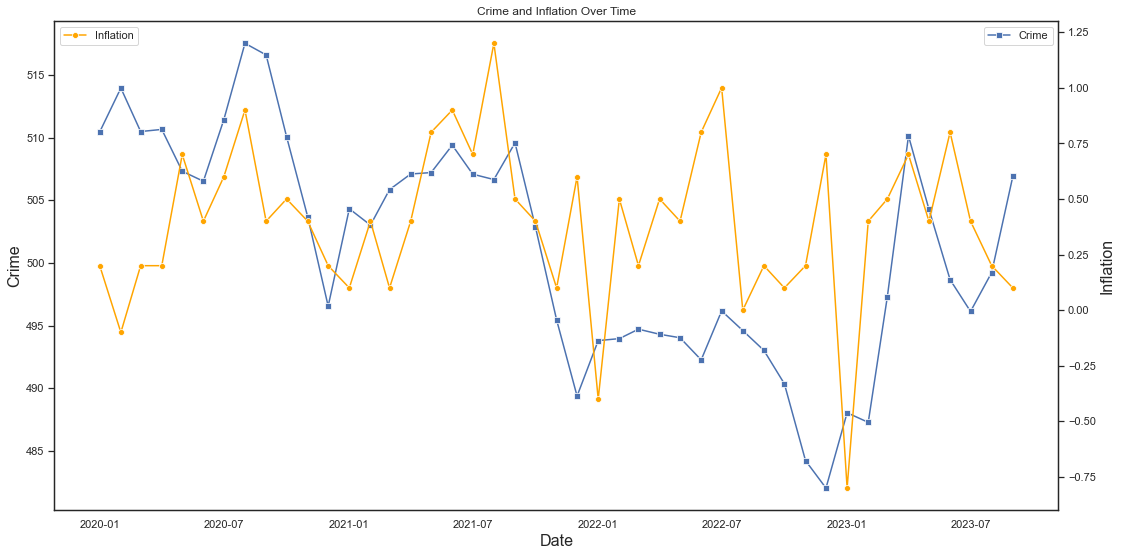

In [740]:
# Plotting the crime trend and Inflation rate over the years
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plotting style
sns.set(style="white")

# Create the first plot
plt.figure(figsize=(18, 9))  # Adjust the figure size if needed
ax1 = sns.lineplot(x='Date', y='Crime', data=df_1, marker='s', label='Crime')

# Create the second plot with a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Inflation', data=df_1, ax=ax2, marker='o', color='orange', label='Inflation')

# Set labels and title
ax1.set_xlabel('Date', fontsize = 16)
ax1.set_ylabel('Crime', fontsize = 16)
ax2.set_ylabel('Inflation', fontsize = 16)
plt.title('Crime and Inflation Over Time')
plt.legend(loc = 'upper left') 


# Show the plot
plt.show()


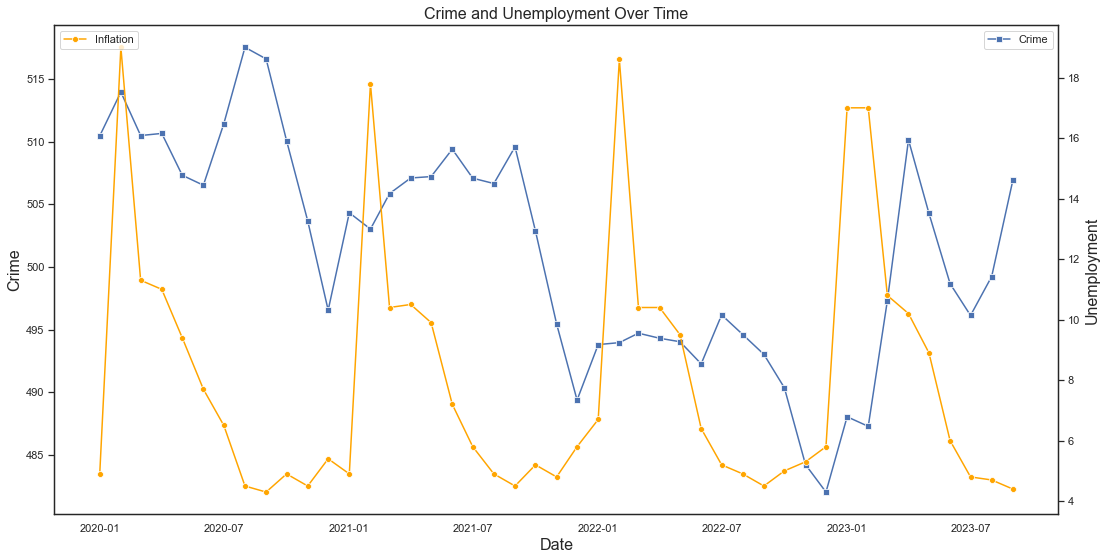

In [741]:
# Plotting Crime and Unemployment rate over the years
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plotting style
sns.set(style="white")

# Create the first plot
plt.figure(figsize=(18, 9))  # Adjust the figure size if needed
ax1 = sns.lineplot(x='Date', y='Crime', data=df_1, marker='s', label='Crime')

# Create the second plot with a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Unemployment', data=df_1, ax=ax2, marker='o', color='orange', label='Inflation')

# Set labels and title
ax1.set_xlabel('Date',fontsize = 16)
ax1.set_ylabel('Crime',fontsize = 16)
ax2.set_ylabel('Unemployment',fontsize = 16)
plt.title('Crime and Unemployment Over Time',fontsize = 16)
plt.legend(loc = 'upper left') 


# Show the plot
plt.show()

## Analyze the relationship between the day of the week and the frequency of certain types of crimes.

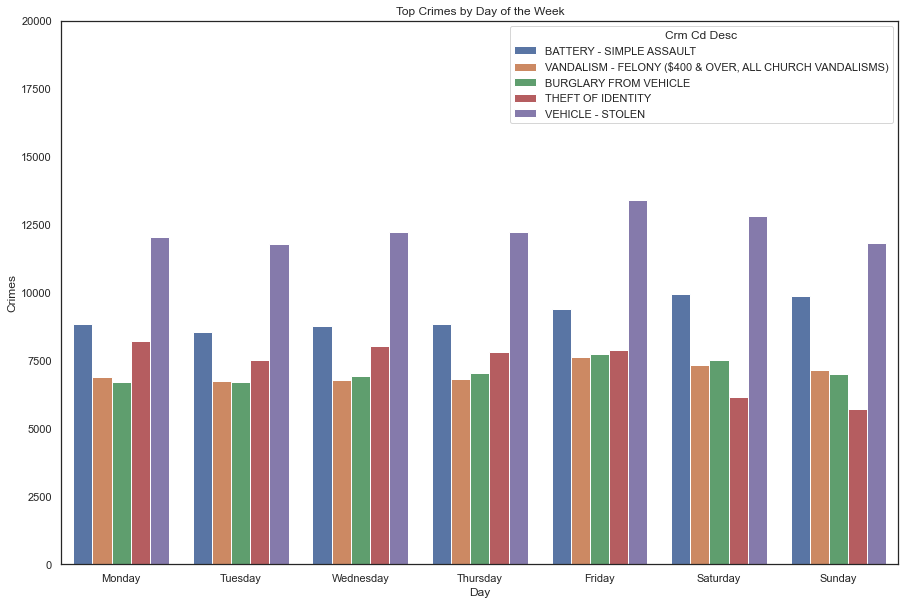

In [742]:
# Displaying relationship between the day of the week and the frequency of certain types of crimes.
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['Date Time OCC'])
crime_data['DayOfWeek'] = crime_data['Date Time OCC'].dt.day_name()
top_crimes = crime_data['Crm Cd Desc'].value_counts().index[:5]
filtered_df = crime_data[crime_data['Crm Cd Desc'].isin(top_crimes)]

order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
sns.countplot(x='DayOfWeek', hue='Crm Cd Desc', data=filtered_df, order=order_days)
plt.title('Top Crimes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Crimes')
plt.ylim(0, 20000)
plt.show()

### Impact of Major Events

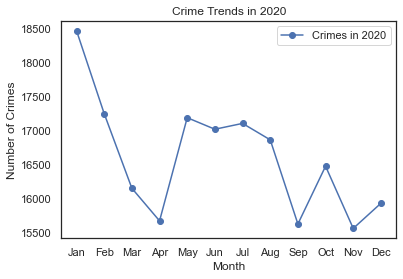

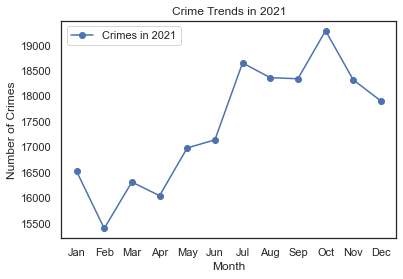

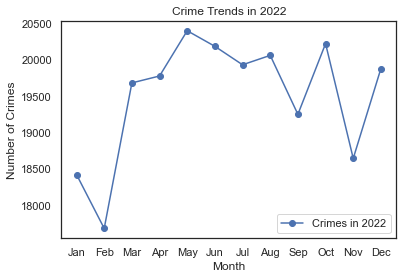

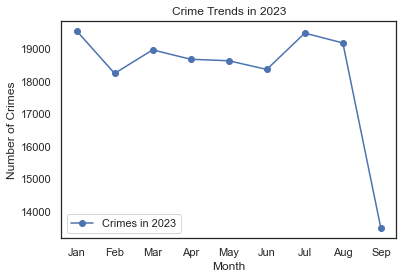

In [743]:
# Displaying Crime rates year wise
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'Year' and 'Month' columns

# Group the data by year and month, then count the number of crimes for each year and month
yearly_monthly_crime_counts = crime_data.groupby(['Year', 'Month']).size().unstack()

# Create a line chart for each year
for year in yearly_monthly_crime_counts.index:
    monthly_data = yearly_monthly_crime_counts.loc[year]
    # Replace numerical month values with month names
    monthly_data.index = [pd.Timestamp(2000, m, 1).strftime('%b') for m in monthly_data.index]
    
    plt.figure()  # Create a new figure for each year
    plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-', label=f'Crimes in {year}')
    plt.title(f'Crime Trends in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.legend()

plt.show()  # Display all the individual line charts


In [744]:
# Displying month wise crime counts over the years
yearly_monthly_crime_counts

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,18473.0,17252.0,16154.0,15674.0,17193.0,17023.0,17109.0,16867.0,15628.0,16479.0,15563.0,15933.0
2021,16525.0,15402.0,16313.0,16045.0,16983.0,17141.0,18653.0,18363.0,18342.0,19285.0,18321.0,17906.0
2022,18424.0,17685.0,19682.0,19777.0,20398.0,20184.0,19931.0,20060.0,19251.0,20221.0,18646.0,19879.0
2023,19548.0,18238.0,18961.0,18672.0,18627.0,18360.0,19475.0,19173.0,13479.0,NaN,NaN,NaN


In [745]:
# Displaying first 5 rows od the dataframe
crime_data1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,,34.0141,-118.2978,1
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,,34.0459,-118.2545,1
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,,34.0448,-118.2474,0
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,,34.1685,-118.4019,0
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,,34.2198,-118.4468,0


In [746]:
# Filtering the dataframe based on specific events
us_election = crime_data1.loc[(crime_data1['DATE OCC'] >= '2020-10-01') & (crime_data1['DATE OCC'] < '2021-02-28')]
us_election.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
15,211916029,2021-11-26,2020-11-30,07:30,19,Mission,1916,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,14200 BERG ST,,34.3055,-118.4439,1
16,201116159,2020-11-29,2020-11-28,20:18,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,3200 W AVENUE 32,,34.1186,-118.2450,1
18,210916801,2021-11-22,2020-11-19,12:00,9,Van Nuys,932,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14700 FRIAR ST,,34.1857,-118.4574,0
23,211014725,2021-11-18,2020-12-28,00:01,10,West Valley,1045,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,5700 ENFIELD AV,,34.1748,-118.5228,0
25,211015072,2021-11-29,2020-11-01,12:00,10,West Valley,1043,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,18600 COLLINS ST,,34.1745,-118.5383,0


In [747]:
# Calculating value counts for the specific events
us_election_count = us_election['DATE OCC'].dt.date.value_counts().sort_index()
us_election_count

2020-10-01    726
2020-10-02    569
2020-10-03    542
2020-10-04    505
2020-10-05    525
             ... 
2021-02-23    541
2021-02-24    531
2021-02-25    541
2021-02-26    619
2021-02-27    577
Name: DATE OCC, Length: 150, dtype: int64

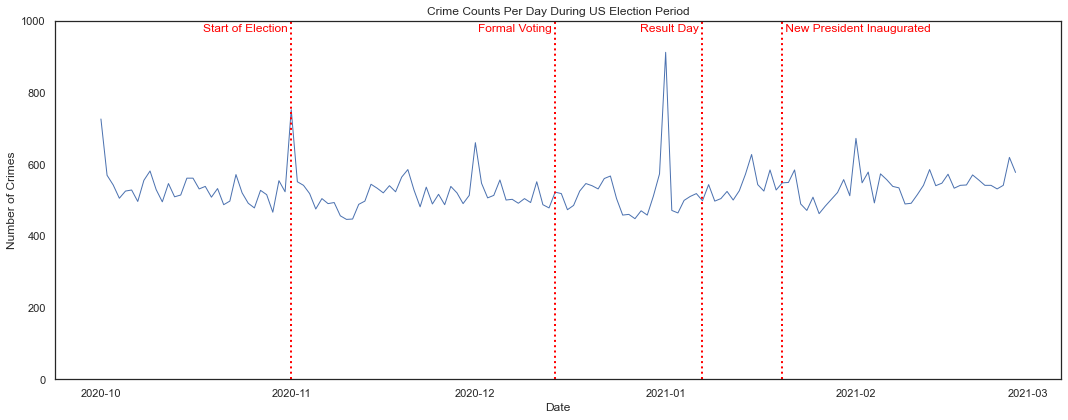

In [748]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(us_election_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts Per Day During US Election Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

election_start = pd.to_datetime('2020-11-01')
formal_voting = pd.to_datetime('2020-12-14')
result_day = pd.to_datetime('2021-01-07')
inauguration_day = pd.to_datetime('2021-01-20')

ax.axvline(x=election_start, color='red', linestyle=':', linewidth=2)
ax.axvline(x=formal_voting, color='red', linestyle=':', linewidth=2)
ax.axvline(x=result_day, color='red', linestyle=':', linewidth=2)
ax.axvline(x=inauguration_day, color='red', linestyle=':', linewidth=2)

ax.annotate('Start of Election ', xy=(election_start, 950), xytext=(election_start, 970),
             ha='right', color='red')

ax.annotate('Formal Voting ', xy=(formal_voting, 950), xytext=(formal_voting, 970),
             ha='right', color='red')

ax.annotate('Result Day ', xy=(result_day, 950), xytext=(result_day, 970),
             ha='right', color='red')

ax.annotate(' New President Inaugurated', xy=(inauguration_day, 950), xytext=(inauguration_day, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()

In [749]:
# Filtering the dataframe based on specific events
George_Floyd_Protests = crime_data1.loc[(crime_data1['DATE OCC'] >= '2020-04-15') & (crime_data1['DATE OCC'] < '2020-07-30')]
George_Floyd_Protests.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
9,201710201,2020-06-19,2020-05-26,19:25,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,,34.2864,-118.5021,0
31,210816993,2021-11-24,2020-04-28,01:00,8,West LA,859,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,8500 CASHIO ST,,34.0507,-118.3762,0
32,201111990,2020-07-29,2020-07-29,20:20,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,3200 W AVENUE 32,,34.1186,-118.2450,1
39,200810920,2020-06-20,2020-06-20,10:00,8,West LA,841,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,12100 SANTA MONICA BL,,34.0423,-118.4656,1
52,201112187,2020-08-04,2020-07-16,19:00,11,Northeast,1144,2,662,"BUNCO, GRAND THEFT",...,Invest Cont,662.0,NaN,NaN,NaN,2100 HYPERION AV,,34.0990,-118.2738,0


In [750]:
# Calculating value counts for the specific events
George_Floyd_Protests_count = George_Floyd_Protests['DATE OCC'].dt.date.value_counts().sort_index()
George_Floyd_Protests_count

2020-04-15    525
2020-04-16    542
2020-04-17    548
2020-04-18    520
2020-04-19    519
             ... 
2020-07-25    526
2020-07-26    511
2020-07-27    549
2020-07-28    531
2020-07-29    533
Name: DATE OCC, Length: 106, dtype: int64

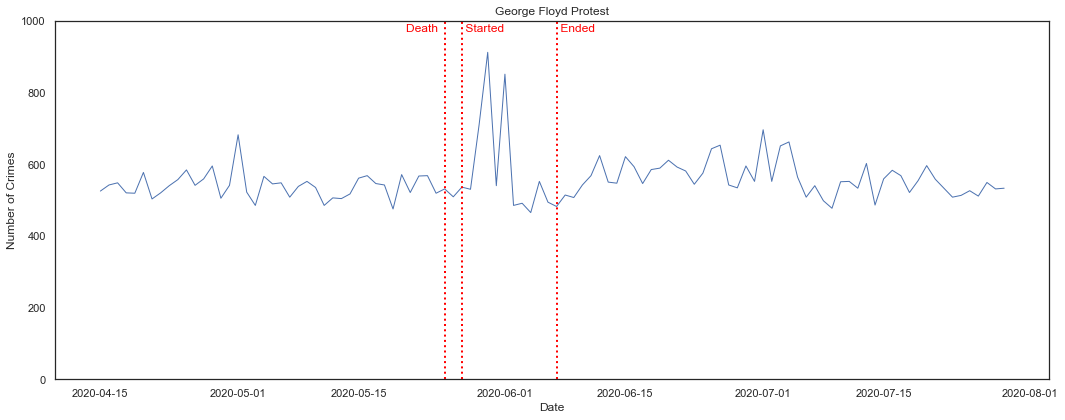

In [751]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(George_Floyd_Protests_count, linestyle='-', linewidth=1)

ax.set_title('George Floyd Protest')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

Death = pd.to_datetime('2020-05-25')
Protests_started = pd.to_datetime('2020-05-27')
Protests_ended= pd.to_datetime('2020-06-07')


ax.axvline(x=Death, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_started, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_ended, color='red', linestyle=':', linewidth=2)

ax.annotate('Death  ', xy=(Death, 950), xytext=(Death, 970),
             ha='right', color='red')

ax.annotate(' Started ', xy=(Protests_started, 950), xytext=(Protests_started, 970),
             ha='left', color='red')

ax.annotate(' Ended ', xy=(Protests_ended, 950), xytext=(Protests_ended, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()


In [752]:
# Filtering the dataframe based on specific events
Min_wages = crime_data1.loc[(crime_data1['DATE OCC'] >= '2022-04-01') & (crime_data1['DATE OCC'] < '2022-07-30')]
Min_wages.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
408700,221809626,2022-04-23,2022-04-22,21:00,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,SAN PEDRO ST 120TH ...,120TH ST,33.9237,-118.2696,0
408701,221711121,2022-07-10,2022-07-10,02:00,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,8800 OSO AV,,34.2299,-118.5754,1
408706,221508072,2022-04-10,2022-04-10,06:50,15,N Hollywood,1539,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,10600 BURBANK BL,,34.1758,-118.3643,0
408711,220613315,2022-07-17,2022-07-17,14:15,6,Hollywood,668,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,5600 FERNWOOD AV,,34.0958,-118.3110,1
408712,221909398,2022-05-12,2022-05-10,19:30,19,Mission,1961,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,9100 N SEPULVEDA BL,,34.2446,-118.4676,1


In [753]:
# Calculating value counts for the specific events
Min_wages_count = Min_wages['DATE OCC'].dt.date.value_counts().sort_index()
Min_wages_count

2022-04-01    1018
2022-04-02     874
2022-04-03     825
2022-04-04     697
2022-04-05     634
              ... 
2022-07-25     580
2022-07-26     561
2022-07-27     621
2022-07-28     585
2022-07-29     642
Name: DATE OCC, Length: 120, dtype: int64

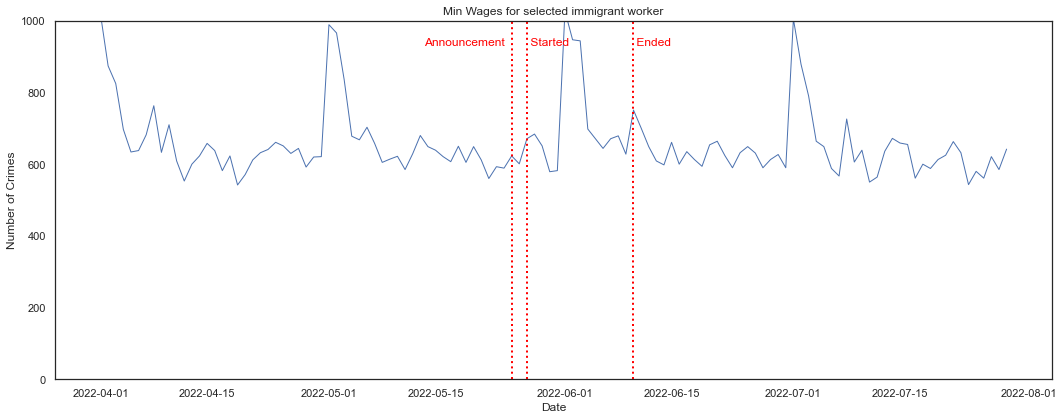

In [754]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Min_wages_count, linestyle='-', linewidth=1)

ax.set_title('Min Wages for selected immigrant worker')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

Announcement = pd.to_datetime('2022-05-25')
Protests_started = pd.to_datetime('2022-05-27')
Protests_ended= pd.to_datetime('2022-06-10')


ax.axvline(x=Announcement, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_started, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_ended, color='red', linestyle=':', linewidth=2)

ax.annotate('Announcement  ', xy=(Announcement, 300), xytext=(Announcement, 930),
             ha='right', color='red')

ax.annotate(' Started ', xy=(Protests_started, 930), xytext=(Protests_started, 930),
             ha='left', color='red')

ax.annotate(' Ended ', xy=(Protests_ended, 930), xytext=(Protests_ended, 930),
             ha='left', color='red')

plt.tight_layout()
plt.show()


In [755]:
# Filtering the dataframe based on specific events
Covid = crime_data1.loc[(crime_data1['DATE OCC'] >= '2020-01-01') & (crime_data1['DATE OCC'] < '2022-06-01')]
Covid.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weapon Used
0,10304468,2020-01-08,2020-01-08,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,,34.0141,-118.2978,1
1,190101086,2020-01-02,2020-01-01,03:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,,34.0459,-118.2545,1
2,200110444,2020-04-14,2020-02-13,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,,34.0448,-118.2474,0
3,191501505,2020-01-01,2020-01-01,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,,34.1685,-118.4019,0
4,191921269,2020-01-01,2020-01-01,04:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,,34.2198,-118.4468,0


In [756]:
# Calculating value counts for the specific events
Covid_count = Covid['DATE OCC'].dt.date.value_counts().sort_index()
Covid_count

2020-01-01    1103
2020-01-02     527
2020-01-03     595
2020-01-04     540
2020-01-05     505
              ... 
2022-05-27     671
2022-05-28     684
2022-05-29     651
2022-05-30     579
2022-05-31     582
Name: DATE OCC, Length: 882, dtype: int64

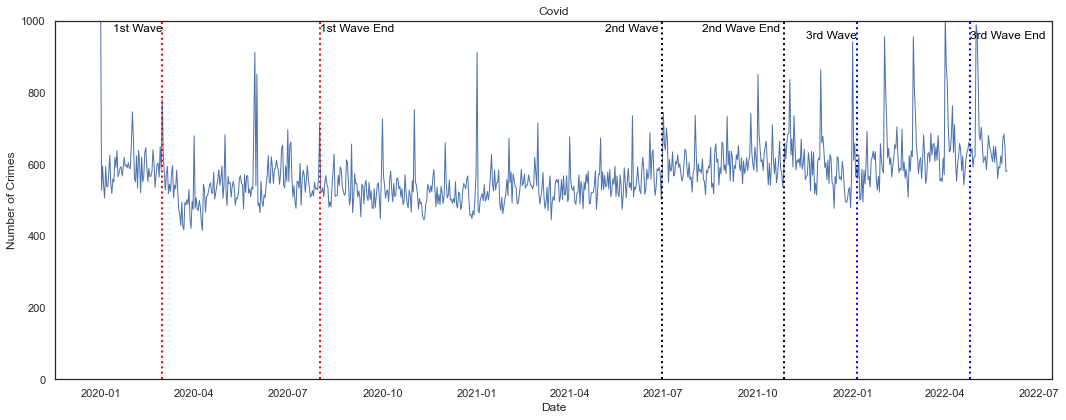

In [757]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Covid_count, linestyle='-', linewidth=1)

ax.set_title('Covid')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

First_wave = pd.to_datetime('2020-03-01')
FirstWave_ended = pd.to_datetime('2020-08-01')
Second_wave= pd.to_datetime('2021-06-30')
Secondwave_ended= pd.to_datetime('2021-10-26')
Third_wave= pd.to_datetime('2022-01-05')
Thirdwave_ended= pd.to_datetime('2022-04-25')


ax.axvline(x=First_wave, color='red', linestyle=':', linewidth=2)
ax.axvline(x=FirstWave_ended, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Second_wave, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Secondwave_ended, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Third_wave, color='blue', linestyle=':', linewidth=2)
ax.axvline(x=Thirdwave_ended, color='blue', linestyle=':', linewidth=2)

ax.annotate('1st Wave', xy=(First_wave, 950), xytext=(First_wave, 970),
             ha='right', color='black')

ax.annotate('1st Wave End', xy=(FirstWave_ended, 950), xytext=(FirstWave_ended, 970),
             ha='left', color='black')

ax.annotate('2nd Wave ', xy=(Second_wave, 950), xytext=(Second_wave, 970),
             ha='right', color='black')
ax.annotate('2nd Wave End ', xy=(Secondwave_ended, 950), xytext=(Secondwave_ended, 970),
             ha='right', color='black')

ax.annotate('3rd Wave', xy=(Third_wave, 950), xytext=(Third_wave, 950),
             ha='right', color='black')

ax.annotate('3rd Wave End', xy=(Thirdwave_ended, 950), xytext=(Thirdwave_ended, 950),
             ha='left', color='black')

plt.tight_layout()
plt.show()

# Outliers and Anomalies

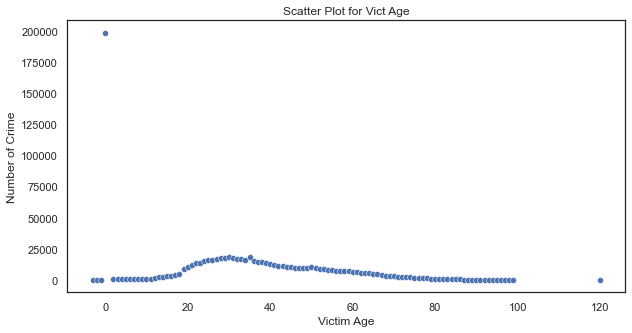

In [758]:
#Scatter Plot for Vict Age
age_wise = data_crime.groupby('Vict Age')['Crm Cd'].count()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=age_wise.index, y=age_wise.values)
plt.title('Scatter Plot for Vict Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crime')
plt.show()

In [759]:
age_wise

Vict Age
-3           1
-2          12
-1          55
 0      198667
 2         359
         ...  
 96         84
 97         60
 98         64
 99        304
 120         1
Name: Crm Cd, Length: 103, dtype: int64

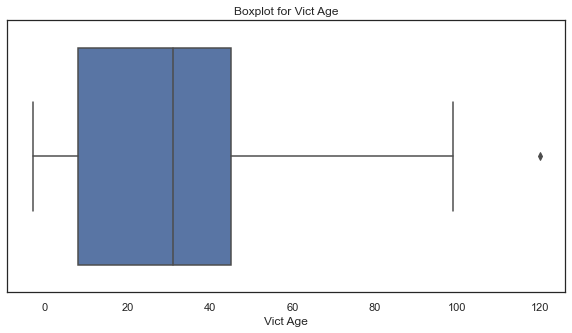

In [760]:
#Boxplot for Vict Age
plt.figure(figsize=(10, 5))
sns.boxplot(data_crime['Vict Age'])
plt.title('Boxplot for Vict Age')
plt.show()

# Demographic Factors

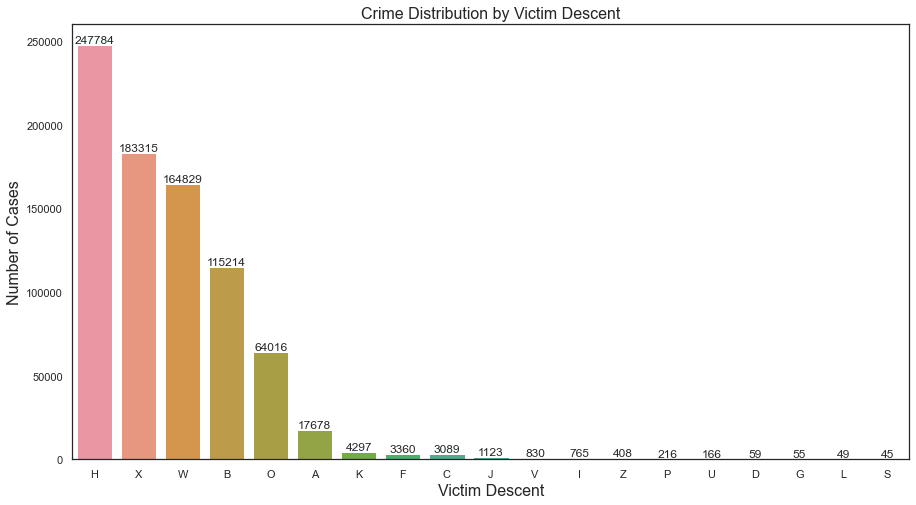

In [761]:
# Plotting Crime distribution by Victim Descent
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Vict Descent', data=crime_data, order=crime_data['Vict Descent'].value_counts().index)
plt.title('Crime Distribution by Victim Descent', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xlabel('Victim Descent',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

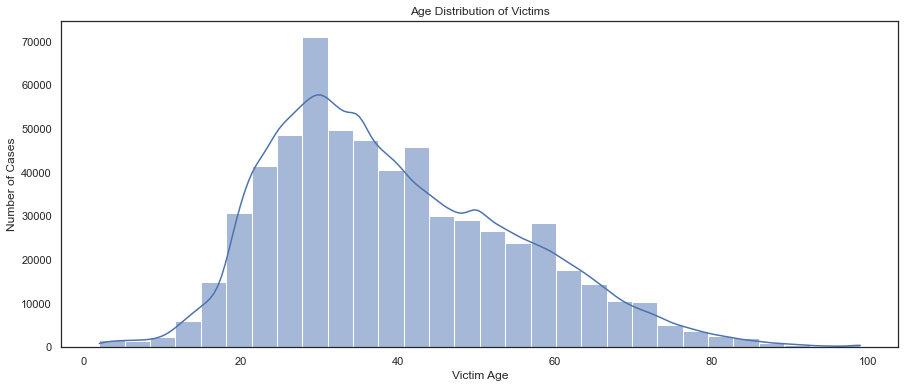

In [762]:
# Plotting age distribution of Victims
vict_age_data = crime_data[crime_data['Vict Age'].between(1,100)]

plt.figure(figsize=(15, 6))
ax = sns.histplot(vict_age_data['Vict Age'], bins=30, kde=True)
plt.title('Age Distribution of Victims')
plt.ylabel('Number of Cases')
plt.xlabel('Victim Age')
plt.show()


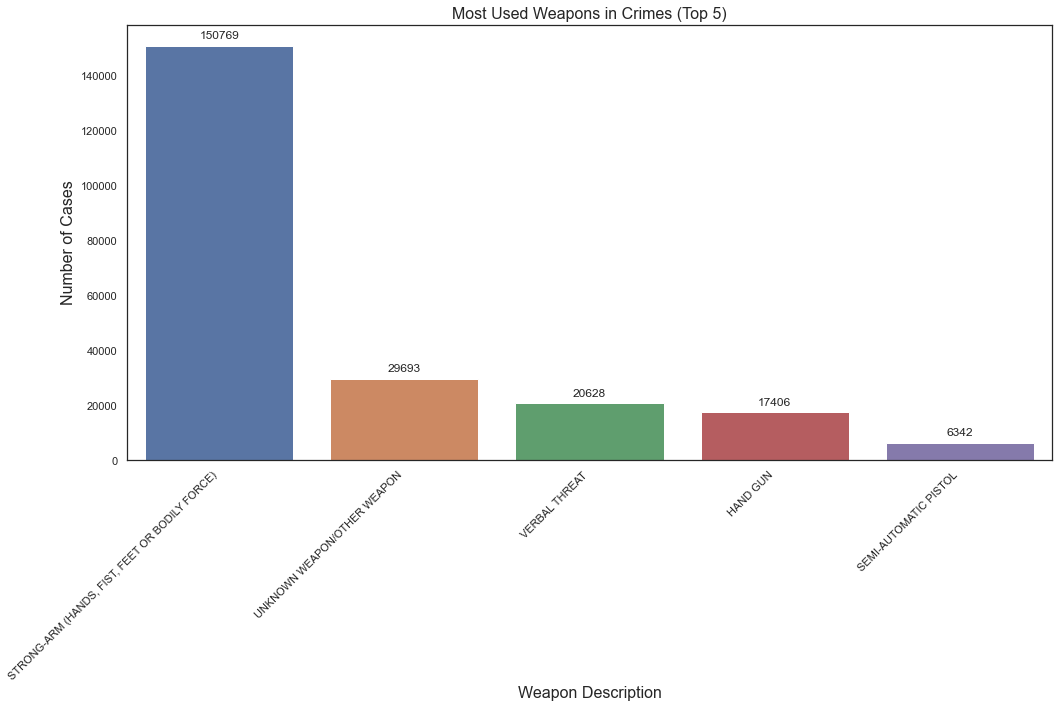

In [763]:
# Plotting most used Weapons in Crimes
plt.figure(figsize=(15, 10))
top_5_weapons = data_crime['Weapon Desc'].value_counts().index[:5]
ax = sns.countplot(x='Weapon Desc', data=data_crime, order=top_5_weapons)
plt.title('Most Used Weapons in Crimes (Top 5)', fontsize = 16)
plt.xlabel('Weapon Description', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


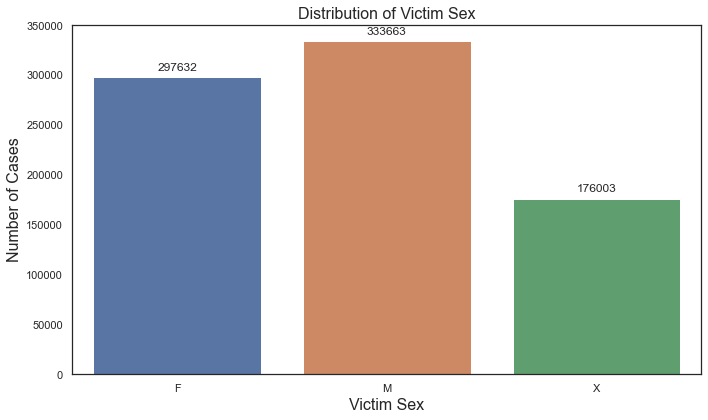

In [764]:
# Plotting Distribution of Victim Sex
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Vict Sex', data =crime_data)
plt.title('Distribution of Victim Sex',fontsize = 16)
plt.xlabel('Victim Sex',fontsize = 16)
plt.ylabel('Number of Cases',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


# Advanced Analysis

In [765]:
# Creating a copy of the crime data
df = crime_data.copy()

In [766]:
# Converting month-year column into the month year format
df['month-year'] = df['Date Time OCC'].dt.strftime('%m-%Y')
df.head(3)

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month,DayOfWeek,month-year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01,Wednesday,01-2020
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01,Wednesday,01-2020
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02,Thursday,02-2020


In [767]:
# Grouping the crimes by month and year
df = df.groupby('month-year')['Crm Cd'].count()

In [768]:
# renaming columns and converting to appropriate data types
df_1 = df.to_frame().reset_index()
df_1 = df_1.rename(columns={'month-year':'Date','Crm Cd':'Crime'})
df_1['Date'] = pd.to_datetime(df_1['Date'])

# adding new column for number of days in month
df_1['days_in_month'] = df_1['Date'].dt.days_in_month
df_1.head()

,Date,Crime,days_in_month
0,2020-01-01,18473,31
1,2021-01-01,16525,31
2,2022-01-01,18424,31
3,2023-01-01,19548,31
4,2020-02-01,17252,29


In [769]:
# Normalising the number of crime by dividing it by number of days in respective months
df_1['Crime'] = round((df_1['Crime']/df_1['days_in_month']))
df_1.drop(columns=['days_in_month'],inplace=True)
df_1.head()

,Date,Crime
0,2020-01-01,596.0
1,2021-01-01,533.0
2,2022-01-01,594.0
3,2023-01-01,631.0
4,2020-02-01,595.0


In [770]:
# Sorting values of the dataframe based on date
df_1 = df_1.sort_values(by='Date').reset_index(drop=True) 

In [771]:
# reseting the Index of the Dataframe
df_1.set_index('Date',inplace=True)

In [772]:
df_1 = df_1[:-1]
df_1.shape

(44, 1)

In [773]:
# Importing stats libraries  
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [774]:
# decomposing the data to analyse the trends, seasonality and residuals if any
result = seasonal_decompose(df_1['Crime'],model = 'additive',period = 12)

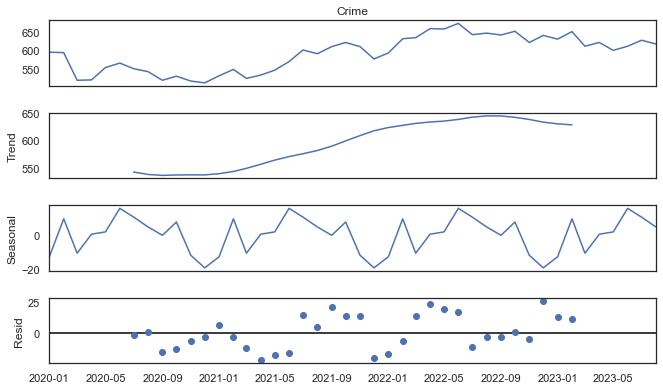

In [775]:
# visualising decomposition
ax = result.plot()
ax.set_size_inches(10,6)

1) The first subplot on the very top shows the plot for the original data with no decomposition. 2) The second subplot shows a clear smooth trend pattern in the data. This is clear evidence of a non-constant mean. 3) The third subplot shows the decomposed seasonality pattern in the data. 4) The last subplot shows the noise or residual component in the time series data

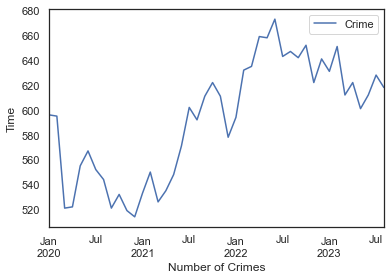

In [776]:
# Fluctuations in number of crime over time
df_1.plot()
plt.xlabel('Number of Crimes')
plt.ylabel('Time')
plt.show()

From the figures above we can observe that the data violates the stationarity assumption of constant mean, constant variance and constant covariance.

In [777]:
# Implementing the Augmented Dicky Fuller test to test the stationarity of data
ADF = adfuller(df_1['Crime'])

In [778]:
def ADF_CHECK(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ["ADF Test statistic","p-value","# of lags","Num of observations used"]

    for val,lab in zip(result,labels):
        print(lab + ":" + str(val))
        
    alpha = 0.05   
    if result[1]<=alpha:
        print("Reject null hypothesis")
        print("Data does not have a unit root and is stationery")
    else:
        print("Fail to reject null hypothesis")
        print("Data has a unit root and it is non-stationery")

In [779]:
ADF_CHECK(df_1['Crime'])

Augmented Dicky-Fuller Test
ADF Test statistic:-1.476818637033769
p-value:0.5449460798531901
# of lags:0
Num of observations used:43
Fail to reject null hypothesis
Data has a unit root and it is non-stationery


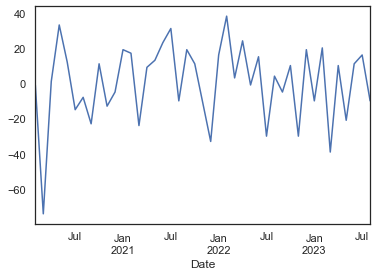

In [780]:
# difference the data and check for stationarity again
df_1["Difference_1"] = df_1['Crime']-df_1['Crime'].shift(1)
df_1.dropna(inplace=True)
df_1["Difference_1"].plot()
plt.show();

In [781]:
ADF_CHECK(df_1["Difference_1"])

Augmented Dicky-Fuller Test
ADF Test statistic:-7.09415242593814
p-value:4.332824012200676e-10
# of lags:0
Num of observations used:42
Reject null hypothesis
Data does not have a unit root and is stationery


##### Data is Stationary now

<AxesSubplot:xlabel='Date'>

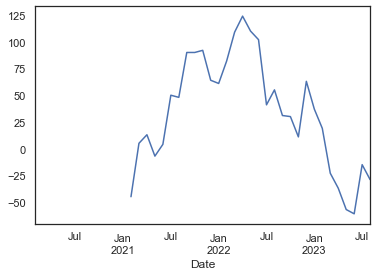

In [782]:
df_1["Seasonal Difference"] = df_1['Crime']-df_1['Crime'].shift(12)
df_1["Seasonal Difference"].plot()

We will look at the Autocorrelation function (ACF) plot and the Partial Autocorrelation Function (PACF) plots to get get a sense of which lags are significant.

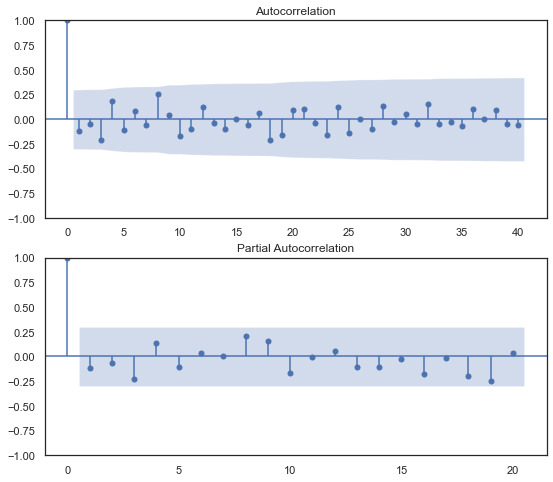

In [783]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))

ACF = plot_acf(df_1["Difference_1"],lags=40, alpha=0.05, ax=ax1)
PACF = plot_pacf(df_1["Difference_1"],lags=20,alpha=0.05,ax=ax2)
plt.show()

"When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase. When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal frequency) than for other lags." -- https://otexts.com/fpp2/autocorrelation.html

Implementing the Seasonal ARIMA time series model to forecast the future crimes.

In [784]:
SARIMA_model = SARIMAX(df_1['Crime'],order = (1,1,1),seasonal_order = (1,1,1,12))

In [785]:
result = SARIMA_model.fit(disp=0)

In [786]:
# reults
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Crime   No. Observations:                   43
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -137.846
Date:                            Fri, 03 Nov 2023   AIC                            285.692
Time:                                    22:18:33   BIC                            292.698
Sample:                                02-01-2020   HQIC                           287.934
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8472      0.994     -0.852      0.394      -2.796       1.101
ma.L1          0.7742      1.132   

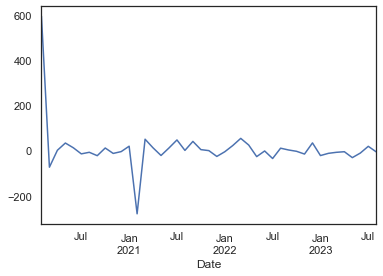

In [787]:
# graphical representation of residuals (goodness of fit)
result.resid.plot()
plt.show();

##### Backtesting - Visualising how the model is performing over the past data

<AxesSubplot:xlabel='Date'>

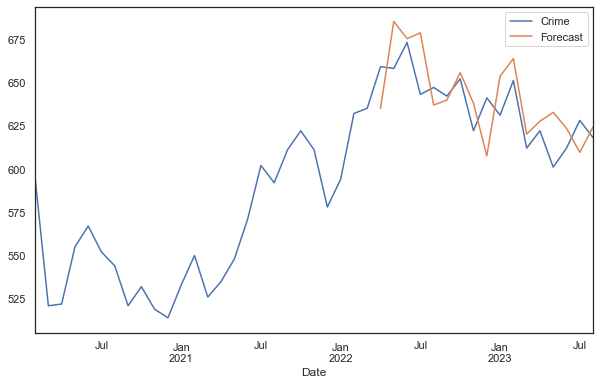

In [788]:
predicted = result.predict(start=17, end=44)
df_1["Forecast"] = result.predict(start=26, end=44)
df_1[["Crime","Forecast"]].plot(figsize = (10,6))
#Orange one is the one predicted by the sarima model

As we can see, the model fits really well for the past data

### Generating the future dates in order to forecast the number of crimes in future

In [789]:
from pandas.tseries.offsets import DateOffset

In [790]:
future_dates = [df_1.index[-1] + DateOffset(months = x) for x in range(1,10)]

In [791]:
future_data = pd.DataFrame(index = future_dates,columns = df_1.columns)

In [792]:
final_data = pd.concat([df_1,future_data])
final_data.head()

,Crime,Difference_1,Seasonal Difference,Forecast
2020-02-01,595.0,-1.0,NaN,NaN
2020-03-01,521.0,-74.0,NaN,NaN
2020-04-01,522.0,1.0,NaN,NaN
2020-05-01,555.0,33.0,NaN,NaN
2020-06-01,567.0,12.0,NaN,NaN


In [793]:
# forecasting
final_data["Forecast"] = result.predict(start = 42,end = 57)
final_data["Forecast"][44]

629.9567343722845

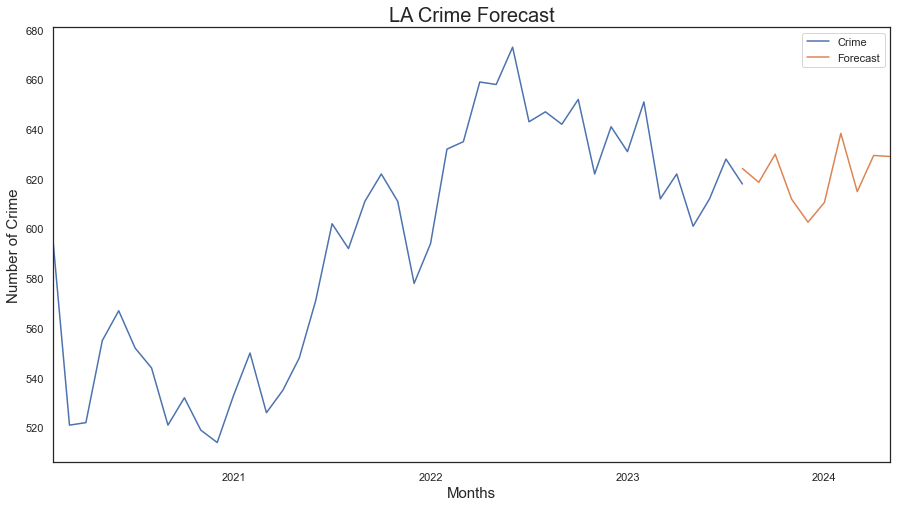

In [794]:
# visualising the number of crimes, that are forecasted by our model
final_data["Crime"].plot()
final_data["Forecast"].plot(figsize = (15,8))
plt.title("LA Crime Forecast",size = 20)
plt.xlabel("Months",size=15)
plt.ylabel("Number of Crime",size=15)
plt.legend();

In [795]:
from sklearn.metrics import mean_squared_error
from math import sqrt
 
actual = df_1['Crime'][17:-1]
predicted = predicted[:-3]

rmse = sqrt(mean_squared_error(actual,predicted))
print('RMSE of SARIMA model:',round(rmse,2))

RMSE of SARIMA model: 23.84


### Prophet time series forecasting

In [796]:
from prophet import Prophet

In [797]:
df = crime_data.copy()

In [798]:
df.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month,DayOfWeek
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01,Wednesday
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01,Wednesday
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02,Thursday
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01,Wednesday
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01,Wednesday


In [799]:
df['month-year'] = df['Date Time OCC'].dt.strftime('%m-%Y')
df.head(3)

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month,DayOfWeek,month-year
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01,Wednesday,01-2020
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01,Wednesday,01-2020
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02,Thursday,02-2020


In [800]:
df = df.groupby('month-year')['Crm Cd'].count()

In [801]:
df_2 = df.to_frame().reset_index()
df_2 = df_2.rename(columns={'month-year':'Date','Crm Cd':'Crime'})
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2['days_in_month'] = df_2['Date'].dt.days_in_month
df_2.head()

,Date,Crime,days_in_month
0,2020-01-01,18473,31
1,2021-01-01,16525,31
2,2022-01-01,18424,31
3,2023-01-01,19548,31
4,2020-02-01,17252,29


In [802]:
df_2['Crime'] = round((df_2['Crime']/df_2['days_in_month']))
df_2.drop(columns=['days_in_month'],inplace=True)
df_2.tail()

,Date,Crime
40,2021-11-01,611.0
41,2022-11-01,622.0
42,2020-12-01,514.0
43,2021-12-01,578.0
44,2022-12-01,641.0


In [803]:
df_2 = df_2.sort_values(by='Date').reset_index(drop=True)

In [804]:
df_2.set_index('Date',inplace=True)

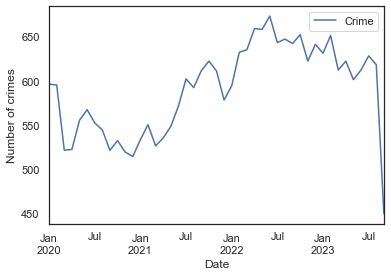

In [805]:
df_2.plot()
plt.ylabel('Number of crimes');

In [806]:
df_2.reset_index(inplace=True)

In [807]:
df_2.rename(columns={'Date':'ds','Crime':'y'},inplace=True)

In [808]:
# Implementing Prophet time series forecasting
model = Prophet()
model.fit(df_2)

22:18:40 - cmdstanpy - INFO - Chain [1] start processing
22:18:41 - cmdstanpy - INFO - Chain [1] done processing


In [809]:
# generating the future dates
future_date = model.make_future_dataframe(periods=10,freq='m')

In [810]:
# predicting for future dates
prediction = model.predict(future_date)

<Figure size 432x288 with 0 Axes>

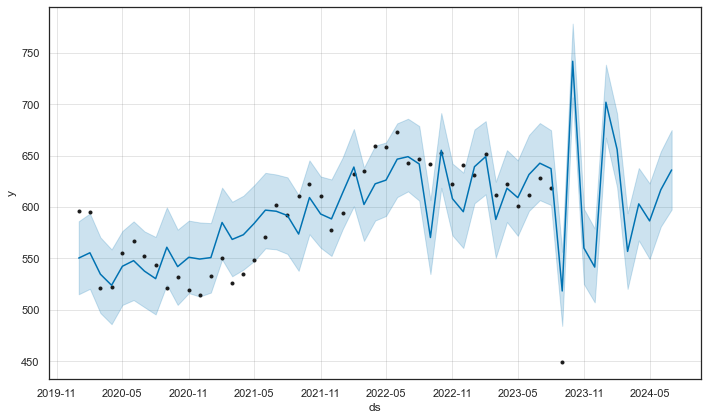

In [811]:
# visualising the predicted number of crime
plt.figure(figsize=(6,4))
model.plot(prediction)
plt.show();

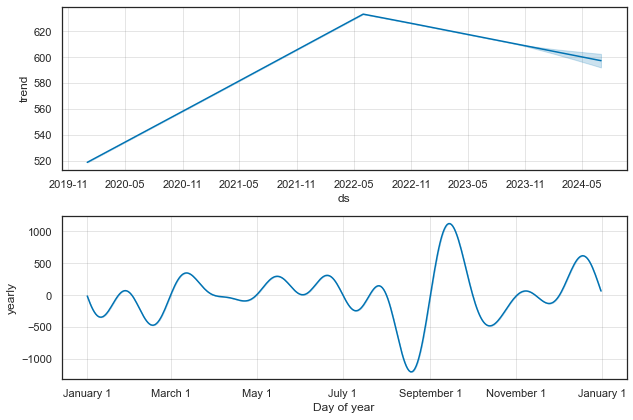

In [812]:
# plotting predicted components
model.plot_components(prediction)
plt.show()

In [813]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.
cutoffs = pd.date_range(start='2020-02-01', end='2022-12-01', freq='1MS')
df_cv = cross_validation(model, horizon='90 days', cutoffs=cutoffs)

# Calculate evaluation metrics
res = performance_metrics(df_cv)
res

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/35 [00:00<?, ?it/s]

22:18:42 - cmdstanpy - INFO - Chain [1] start processing
22:18:42 - cmdstanpy - INFO - Chain [1] done processing
22:18:42 - cmdstanpy - INFO - Chain [1] start processing
22:18:43 - cmdstanpy - INFO - Chain [1] done processing
22:18:43 - cmdstanpy - INFO - Chain [1] start processing
22:18:43 - cmdstanpy - INFO - Chain [1] done processing
22:18:43 - cmdstanpy - INFO - Chain [1] start processing
22:18:44 - cmdstanpy - INFO - Chain [1] done processing
22:18:44 - cmdstanpy - INFO - Chain [1] start processing
22:18:44 - cmdstanpy - INFO - Chain [1] done processing
22:18:44 - cmdstanpy - INFO - Chain [1] start processing
22:18:48 - cmdstanpy - INFO - Chain [1] done processing
22:18:48 - cmdstanpy - INFO - Chain [1] start processing
22:18:49 - cmdstanpy - INFO - Chain [1] done processing
22:18:50 - cmdstanpy - INFO - Chain [1] start processing
22:18:50 - cmdstanpy - INFO - Chain [1] done processing
22:18:50 - cmdstanpy - INFO - Chain [1] start processing
22:18:50 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,30 days,8.486287e+06,2913.123320,1516.066137,2.831829,0.235194,0.651283,0.000000
1,31 days,6.080031e+06,2465.771873,1245.287441,2.285625,0.171131,0.681073,0.050000
2,59 days,3.220122e+06,1794.469879,925.486938,1.712674,1.738926,0.607610,0.021429
3,60 days,2.714752e+06,1647.650589,975.375024,1.822528,1.738926,0.796028,0.014286
4,61 days,1.810914e+07,4255.482997,1748.283899,3.206488,0.141832,0.717658,0.000000
5,62 days,7.388651e+06,2718.207333,1386.647356,2.591603,0.111741,0.645540,0.000000
6,89 days,4.185244e+06,2045.786819,1117.883607,2.086396,0.111741,0.611477,0.000000
7,90 days,1.505619e+06,1227.036492,708.925513,1.318413,0.091759,0.654887,0.000000


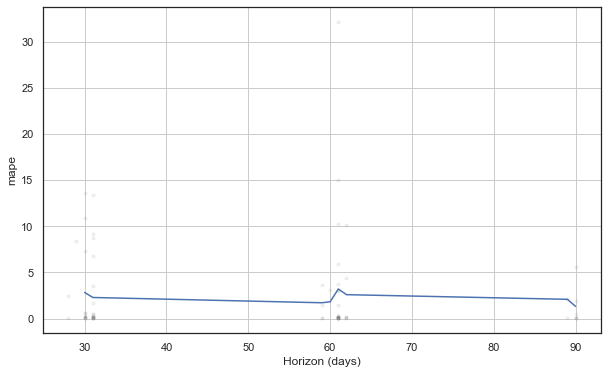

In [814]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')
plt.show()